# Loading Essential Libraries

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Loading Datasets

In [29]:
df = pd.read_csv("Downloads/sonardata.csv")
df.head

<bound method NDFrame.head of           1       2       3       4       5       6       7       8       9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         10  ...     

In [23]:
df1=pd.DataFrame(df)

# Exploratory Data Analysis

In [27]:
df.shape

(207, 61)

In [28]:
#Describing the datasets
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


By this we can access that there is not much difference between the mean and median therefore there will be no outliers but we will have to standardize the data.

In [32]:
#Finding number of rocks and mines in row 61 
print(df.groupby('61').size())

61
M    111
R     97
dtype: int64


This implies that the classes are reasonably balanced between M (mines) and R (rocks).

# Univariate Analysis

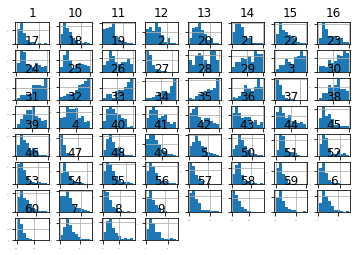

In [35]:
#Histograms
df.hist(xlabelsize=1, ylabelsize=1)
plt.show()

Most of them are Gaussian-like distributions

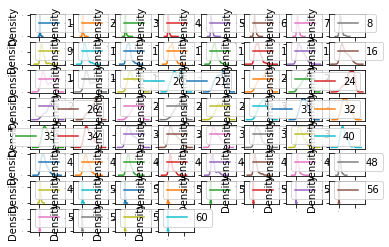

In [36]:
#Density Plots
df.plot(kind='density', subplots=True, layout=(8,8),fontsize=1)
plt.show()

By this, we can conclude that most of the attributes of the datasets are skewed.

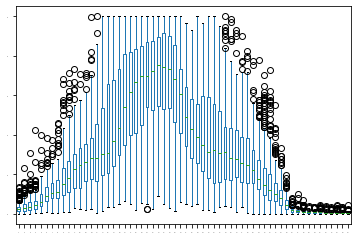

In [38]:
df.plot(kind='box', layout=(8,8),fontsize=1)

This means that data attributes have different spreads and they should be standardize.

# Multivariate Analysis

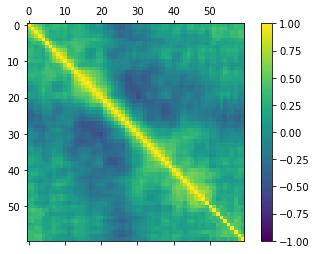

In [40]:
# correlation matrix
plot = plt.figure()
sp = plot.add_subplot(111)
cax = sp.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
plot.colorbar(cax)
plt.show()

Analysis : As visible that the attributes near the diagnol are positively correlated. Other than that the dark blue patches indicate negative correlation between multiple attributes. Whereas navyy blue and green indicate moderate correlations.

# Preparing the data by splitting

In [42]:
x = df.iloc[:,0:60].values.astype(float) #Test
y = df.iloc[:,60]    #Target
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed)

# Evaluating different algorithms

In [45]:
#As the target value is categorical we can use these algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM', SVC()))

In [46]:
#Evaluating every algorithm
results = []
names = []
num_folds = 10
scoring = 'accuracy' 

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.769485 (0.100510)
KNN: 0.808088 (0.067507)
DTC: 0.711029 (0.122413)
NB: 0.648897 (0.141868)
SVM: 0.776471 (0.090411)


After cross validation,the results shows that KNN is the best of the lot followed by the SVM

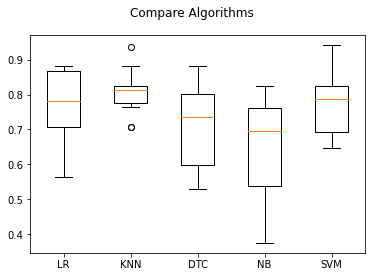

In [47]:
#Comparing Algos
fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle('Compare Algorithms')
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

This confirms that SVM is the best option out of the lot because of its low variance

# Standardizing the learning models 

In [48]:
pipelines=[]
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()), ('CART',  DecisionTreeClassifier())])))
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('Scaled-SVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

In [50]:
#Evaluating every algorithm after standardization
results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results  = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

Scaled-LR: 0.740441 (0.094668)
Scaled-KNN: 0.825735 (0.054511)
Scaled-CART: 0.752574 (0.140237)
Scaled-NB: 0.648897 (0.141868)
Scaled-SVM: 0.836397 (0.088697)


This shows the constant good performance of the KNN but the thing to be notice is that SVM has improved leaps and bounds after standardization of attributes. 

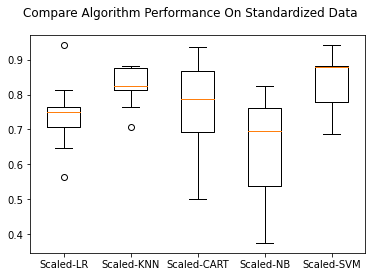

In [51]:
#Comparing Algos after standardization
fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle('Compare Algorithm Performance On Standardized Data ')
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Now, we will proceed with only KNN and SVM

# Tuning KNN and SVM

# KNN

In [53]:
#scaling KNN
scaler = StandardScaler().fit(x_train)
scaledx = scaler.transform(x_train)

# Define hyperparameters for grid-search
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid  = dict(n_neighbors=neighbors)

# creating the model
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(model, param_grid=param_grid, scoring=scoring, cv=kfold)

# Fit grid-search
grid_result = grid.fit(scaledx, y_train)

# Print results of the best score and best parameter
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

# Print the results of grid-search
mean = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['mean_test_score']
params  = grid_result.cv_results_['params']
for mean, stds, params in zip(mean, stds, params):
    print('%f (%f) with: %r' % (mean, stds, params))

Best: 0.850000 using {'n_neighbors': 1}
0.850000 (0.850000) with: {'n_neighbors': 1}
0.837132 (0.837132) with: {'n_neighbors': 3}
0.837500 (0.837500) with: {'n_neighbors': 5}
0.763971 (0.763971) with: {'n_neighbors': 7}
0.751471 (0.751471) with: {'n_neighbors': 9}
0.733456 (0.733456) with: {'n_neighbors': 11}
0.733088 (0.733088) with: {'n_neighbors': 13}
0.727941 (0.727941) with: {'n_neighbors': 15}
0.709926 (0.709926) with: {'n_neighbors': 17}
0.722059 (0.722059) with: {'n_neighbors': 19}
0.710294 (0.710294) with: {'n_neighbors': 21}


We get the best result of 0.85 accuracy when K(neighbor)=1. 

# SVM

In [55]:
# Scale data
scaler = StandardScaler().fit(x_train)
scaledx = scaler.transform(x_train)

# Define hyperparameters for grid-search
c_values = [0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0]
kernel_values = ['linear', 'poly','rbf']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

# Fit grid-search
grid_result  = grid.fit(scaledx, y_train)

# Print results of the best score and best parameter
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

# Print the results of grid-search
mean = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(mean, stds, params):
    print('%f (%f) with: %r' % (mean, std, param))

Best: 0.872426 using {'C': 2.0, 'kernel': 'rbf'}
0.758456 (0.099483) with: {'C': 0.1, 'kernel': 'linear'}
0.535294 (0.114222) with: {'C': 0.1, 'kernel': 'poly'}
0.573162 (0.130930) with: {'C': 0.1, 'kernel': 'rbf'}
0.746324 (0.109507) with: {'C': 0.3, 'kernel': 'linear'}
0.642647 (0.132187) with: {'C': 0.3, 'kernel': 'poly'}
0.765809 (0.091692) with: {'C': 0.3, 'kernel': 'rbf'}
0.740074 (0.082636) with: {'C': 0.5, 'kernel': 'linear'}
0.662132 (0.105668) with: {'C': 0.5, 'kernel': 'poly'}
0.788235 (0.064190) with: {'C': 0.5, 'kernel': 'rbf'}
0.746691 (0.084198) with: {'C': 0.7, 'kernel': 'linear'}
0.746324 (0.129754) with: {'C': 0.7, 'kernel': 'poly'}
0.812500 (0.085513) with: {'C': 0.7, 'kernel': 'rbf'}
0.758824 (0.096520) with: {'C': 0.9, 'kernel': 'linear'}
0.769853 (0.111321) with: {'C': 0.9, 'kernel': 'poly'}
0.836397 (0.088697) with: {'C': 0.9, 'kernel': 'rbf'}
0.752574 (0.098883) with: {'C': 1.0, 'kernel': 'linear'}
0.781985 (0.101194) with: {'C': 1.0, 'kernel': 'poly'}
0.836397 

We are getting an accuracy of 0.87 using c=2 and kernel = rbf

Therefore, SVM is the best algorithm that we can train the data on.

# FInal Classification using SVM

In [58]:
# SVC model for classification
scaler  = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
model = SVC(C=1.5, kernel='rbf')
model.fit(rescaledX, y_train)
# test the algorithm on  dataset
rescaled_vali_X = scaler.transform(x_test)
preditions = model.predict(rescaled_vali_X)
print('Accuracy: ', accuracy_score(y_test, preditions) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(y_test, preditions), '\n')
print('Classification Report : \n ',classification_report(y_test, preditions))

Accuracy:  85.71428571428571 

Confusion Matrix : 
 [[23  4]
 [ 2 13]] 

Classification Report : 
                precision    recall  f1-score   support

           M       0.92      0.85      0.88        27
           R       0.76      0.87      0.81        15

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



Final Accuracy Acheived= 86%